In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# loading pre-defined boston dataset
boston_dataset=datasets.load_boston()   #print(boston_dataset.DESCR)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
# load the data and divide into X & Y 
boston_pd=pd.DataFrame(boston_dataset.data)
boston_pd.columns=boston_dataset.feature_names
boston_pd_target=np.asarray(boston_dataset.target)
boston_pd['House Price']=pd.Series(boston_pd_target)

In [5]:
#input
X=boston_pd.iloc[:,:-1]

#output
Y=boston_pd.iloc[:,-1]

In [6]:
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [7]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [9]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((379, 13), (379,), (127, 13), (127,))

In [10]:
# Apply multiple linear regression model
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [11]:
# generate prediction on test set
lreg_y_pred=lreg.predict(x_test)

In [12]:
#calulating meansquare error(MSE)
mean_squared_error=np.mean((lreg_y_pred-y_test)**2)

print('Mean Squared Error on test set=',mean_squared_error)

Mean Squared Error on test set= 22.42388933844839


In [13]:
# putting together the coefficient and their corrsponding variable names 
lreg_coefficient=pd.DataFrame()
lreg_coefficient["Columns"]=x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)

print(lreg_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.117257
1        ZN              0.045770
2     INDUS             -0.015217
3      CHAS              2.248708
4       NOX            -20.266353
5        RM              3.160608
6       AGE              0.008024
7       DIS             -1.541598
8       RAD              0.299559
9       TAX             -0.010890
10  PTRATIO             -0.949512
11        B              0.009573
12    LSTAT             -0.520840


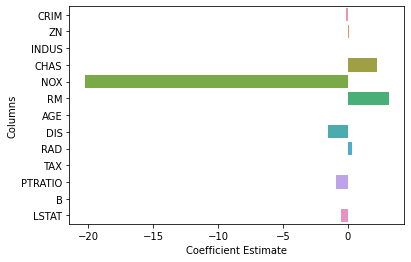

In [14]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate',y="Columns",data=lreg_coefficient)

## **Ridge**

In [15]:
# import ridge regression from sklearn
from sklearn.linear_model import Ridge

In [16]:
# train the model
ridgeR=Ridge(alpha=2)
ridgeR.fit(x_train,y_train)
y_pred=ridgeR.predict(x_test)

In [17]:
#calculate mean square error
mean_squared_error_ridge=np.mean((y_pred-y_test)**2)

print(mean_squared_error_ridge)

22.26437697371932


In [18]:
# get reige cofficient and print them
ridge_coefficient=pd.DataFrame()
ridge_coefficient["Columns"]=x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)

print(ridge_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.112321
1        ZN              0.048803
2     INDUS             -0.063736
3      CHAS              1.871763
4       NOX             -7.528085
5        RM              3.225631
6       AGE             -0.002044
7       DIS             -1.348187
8       RAD              0.273037
9       TAX             -0.012104
10  PTRATIO             -0.810007
11        B              0.010123
12    LSTAT             -0.539410


## **Lasso**

In [19]:
from sklearn.linear_model import Lasso

In [20]:
# train the model
lasso=Lasso(alpha=0.05)
lasso.fit(x_train,y_train)
y_pred1=lasso.predict(x_test)

In [21]:
# calculate mean squared error
mean_squared_error=np.mean((y_pred1-y_test)**2)

print('Mean Squared Error on test set',mean_squared_error)

Mean Squared Error on test set 22.72920484923903


In [22]:
# get lasso cofficient and print them
lasso_coeff=pd.DataFrame()
lasso_coeff["Columns"]=x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

    Columns  Coefficient Estimate
0      CRIM             -0.110511
1        ZN              0.049946
2     INDUS             -0.070047
3      CHAS              1.203890
4       NOX             -3.802039
5        RM              3.186211
6       AGE             -0.002887
7       DIS             -1.266303
8       RAD              0.268429
9       TAX             -0.012747
10  PTRATIO             -0.771095
11        B              0.010325
12    LSTAT             -0.551651


## **Elastic Net**

In [23]:
# import model
from sklearn.linear_model import ElasticNet

In [24]:
# train the model
e_net=ElasticNet(alpha=0.01,l1_ratio=0.5)
e_net.fit(x_train,y_train)

ElasticNet(alpha=0.01)

In [25]:
# calculate the prediction and mean square error
y_pred_elastic=e_net.predict(x_test)
mean_squared_error=np.mean((y_pred_elastic-y_test)**2)

print('Mean Squared Error on test set',mean_squared_error)

Mean Squared Error on test set 22.308970006820385


In [26]:
# get Elastic net cofficient and print them
e_net_coeff=pd.DataFrame()
e_net_coeff["Columns"]=x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)

print(e_net_coeff)

    Columns  Coefficient Estimate
0      CRIM             -0.112144
1        ZN              0.048929
2     INDUS             -0.064400
3      CHAS              1.803346
4       NOX             -7.152371
5        RM              3.218980
6       AGE             -0.002105
7       DIS             -1.339870
8       RAD              0.272640
9       TAX             -0.012171
10  PTRATIO             -0.806190
11        B              0.010143
12    LSTAT             -0.540820
